## **Breakdown of this Section:**

1.**Mounting Google Drive:**
   *   This code block mounts Google Drive to the Colab notebook to access files stored in Google Drive.

2.**CSV files and column headers:**
   - `csv_files`: A list of the names of the CSV files to be processed.
   - `main_labels`: A list of column headers for the CSV files.

3.**Data preprocessing:**
   - The code reads the output CSV file into a Pandas DataFrame.
   - It fills any missing values in the DataFrame with zeros.
   - It identifies the columns containing non-numeric (string or categorical) properties and stores them in `string_features` list.
   - The code attempts to remove the "Label" column from the `string_features` list.
   - It initializes a `LabelEncoder` from scikit-learn to convert non-numeric features to numeric representations.
   - The code iterates over the `string_features` and converts the corresponding columns in the DataFrame to numeric features using label encoding.
   - It drops an unnecessary column (index 61) from the DataFrame.
   - The preprocessed DataFrame is then saved to the output CSV file.

4.**Merging CSV files:**
   - The code checks if it's the first CSV file being processed (controlled by the `flag` variable).
   - If it is, it saves the preprocessed DataFrame to a new file called "all_data.csv".
   - If it's not the first file, it appends the preprocessed DataFrame to the "all_data.csv" file.
   - Finally, it removes the temporary output CSV file.


In [6]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import os
from sklearn import preprocessing
import time

seconds = time.time()
%matplotlib inline

print("This process may take 5 to 10 minutes, depending on the performance of your computer.\n\n\n")
number = "0123456789"

# CSV files names:
csv_files = [
    "Monday-WorkingHours.pcap_ISCX",
    "Tuesday-WorkingHours.pcap_ISCX",
    "Wednesday-workingHours.pcap_ISCX",
    "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX",
    "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX",
    "Friday-WorkingHours-Morning.pcap_ISCX",
    "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX",
    "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX",
]

# Headers of column
main_labels = [
    "Flow ID", "Source IP", "Source Port", "Destination IP", "Destination Port",
    "Protocol", "Timestamp", "Flow Duration", "Total Fwd Packets",
    "Total Backward Packets", "Total Length of Fwd Packets", "Total Length of Bwd Packets",
    "Fwd Packet Length Max", "Fwd Packet Length Min", "Fwd Packet Length Mean",
    "Fwd Packet Length Std", "Bwd Packet Length Max", "Bwd Packet Length Min",
    "Bwd Packet Length Mean", "Bwd Packet Length Std", "Flow Bytes/s",
    "Flow Packets/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max", "Flow IAT Min",
    "Fwd IAT Total", "Fwd IAT Mean", "Fwd IAT Std", "Fwd IAT Max", "Fwd IAT Min",
    "Bwd IAT Total", "Bwd IAT Mean", "Bwd IAT Std", "Bwd IAT Max", "Bwd IAT Min",
    "Fwd PSH Flags", "Bwd PSH Flags", "Fwd URG Flags", "Bwd URG Flags",
    "Fwd Header Length", "Bwd Header Length", "Fwd Packets/s", "Bwd Packets/s",
    "Min Packet Length", "Max Packet Length", "Packet Length Mean", "Packet Length Std",
    "Packet Length Variance", "FIN Flag Count", "SYN Flag Count", "RST Flag Count",
    "PSH Flag Count", "ACK Flag Count", "URG Flag Count", "CWE Flag Count",
    "ECE Flag Count", "Down/Up Ratio", "Average Packet Size", "Avg Fwd Segment Size",
    "Avg Bwd Segment Size", "faulty-Fwd Header Length", "Fwd Avg Bytes/Bulk",
    "Fwd Avg Packets/Bulk", "Fwd Avg Bulk Rate", "Bwd Avg Bytes/Bulk",
    "Bwd Avg Packets/Bulk", "Bwd Avg Bulk Rate", "Subflow Fwd Packets",
    "Subflow Fwd Bytes", "Subflow Bwd Packets", "Subflow Bwd Bytes",
    "Init_Win_bytes_forward", "Init_Win_bytes_backward", "act_data_pkt_fwd",
    "min_seg_size_forward", "Active Mean", "Active Std", "Active Max", "Active Min",
    "Idle Mean", "Idle Std", "Idle Max", "Idle Min", "Label", "External IP"
]

main_labels2 = main_labels
main_labels = ",".join(main_labels) + "\n"

flag = True

for i, csv_file in enumerate(csv_files):
    csv_path = f"/content/drive/MyDrive/bolu/{csv_file}.csv"
    output_csv = f"{i}.csv"

    with open(csv_path, "r") as file:
        ths = open(output_csv, "w")
        ths.write(main_labels)

        while True:
            try:
                line = file.readline()
                if line[0].isdigit():
                    # This line eliminates the headers of CSV files and incomplete streams.
                    if "–" in line:
                        # If there is "–" character (Unicode code: 8211) in the flow, it will be changed with "-" character (Unicode code: 45).
                        line = line.replace("–", "-")
                    line = line.replace("inf", "0")
                    line = line.replace("Infinity", "0")
                    line = line.replace("NaN", "0")
                    ths.write(line)
                else:
                    continue
            except:
                break

        ths.close()

    df = pd.read_csv(output_csv, low_memory=False)
    df = df.fillna(0)

    string_features = ["Flow Bytes/s", "Flow Packets/s"]

    for feature in string_features:
        # Some data in the "Flow Bytes/s" and "Flow Packets/s" columns are not numeric.
        # Fixing this bug in this loop.
        df[feature] = pd.to_numeric(df[feature], errors="coerce").fillna(0)

    string_features = [feature for feature in main_labels2 if df[feature].dtype == "object"]

    try:
        string_features.remove("Label")
    except ValueError:
        pass

    labelencoder_X = preprocessing.LabelEncoder()

    for feature in string_features:
        # In this loop, non-numeric (string and/or categorical) properties are converted to numeric features.
        try:
            df[feature] = labelencoder_X.fit_transform(df[feature])
        except:
            df[feature] = pd.to_numeric(df[feature], errors="coerce").fillna(0)

    df = df.drop(main_labels2[61], axis=1)

    # All CSV files are merged into a single file.
    if flag:
        df.to_csv("all_data.csv", index=False)
        flag = False
    else:
        df.to_csv("all_data.csv", index=False, header=False, mode="a")

    os.remove(output_csv)
    print(f"The pre-processing phase of the {csv_file} file is completed.\n")

print("Mission accomplished!")
print("Total operation time:", time.time() - seconds, "seconds")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
This process may take 5 to 10 minutes, depending on the performance of your computer.



The pre-processing phase of the Monday-WorkingHours.pcap_ISCX file is completed.

The pre-processing phase of the Tuesday-WorkingHours.pcap_ISCX file is completed.

The pre-processing phase of the Wednesday-workingHours.pcap_ISCX file is completed.

The pre-processing phase of the Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX file is completed.

The pre-processing phase of the Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX file is completed.

The pre-processing phase of the Friday-WorkingHours-Morning.pcap_ISCX file is completed.

The pre-processing phase of the Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX file is completed.

The pre-processing phase of the Friday-WorkingHours-Afternoon-DDos.pcap_ISCX file is completed.

Mission accomplished!
Total opera

## **Breakdown of this Section:**

**The purpose of this program is to provide statistics about the data contained in the dataset.**
**Considering that some of the data are very large and some of them are very small, the graphics are created in three separate groups, so that all data can be seen:**
   - big: labels with more than 11000 numbers
   - medium: labels with numbers between 600 and 11000
   - small: labels with fewer than 600 numbers
   
**In the last graphics, the rates of all attacks and normal behaviors are given.**

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns

# Read the data from the CSV file
df = pd.read_csv('all_data.csv', usecols=["Label"])
label_counts = df.iloc[:, 0].value_counts()

# Calculate the count and percentage for "Attack" and "Benign" labels
attack_counts = label_counts.drop("BENIGN")
attack_count = attack_counts.sum()
benign_count = label_counts.get("BENIGN", 0)
total_count = attack_count + benign_count
attack_percentage = attack_count / total_count * 100
benign_percentage = benign_count / total_count * 100

# Create a pie chart using Plotly
fig = go.Figure(data=[go.Pie(labels=["Attack", "Benign"],
                             values=[attack_percentage, benign_percentage],
                             hole=0.6,
                             textposition='outside',
                             textinfo='percent+label',
                             marker=dict(colors=sns.color_palette("plasma", 2),
                                         line=dict(color='#000000', width=1)))])

# Set the title and annotations
fig.update_layout(title_text='Count and Percentage of Attacks and Benign',
                  annotations=[dict(text='Label', x=0.5, y=0.5, font_size=14, showarrow=False)])

# Display the chart
fig.show()


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns

# Read the data from the CSV file
df = pd.read_csv('all_data.csv', usecols=["Label"])
label_counts = df.iloc[:, 0].value_counts()

# Calculate the percentage of labels
label_percentage = label_counts / sum(label_counts) * 100

# Get the color palette
colors = sns.color_palette("plasma", len(label_percentage))

# Create a pie chart using Plotly
fig = go.Figure(data=[go.Pie(labels=label_percentage.index,
                             values=label_percentage.values,
                             hole=0.6,
                             textposition='outside',
                             textinfo='percent+label',
                             marker=dict(colors=colors,
                                         line=dict(color='#000000', width=1)))])

# Set the title and annotations
fig.update_layout(title_text='Count and Percentage of Labels',
                  annotations=[dict(text='Label', x=0.5, y=0.5, font_size=14, showarrow=False)])

# Display the chart
fig.show()


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns

# Read the data from the CSV file
df = pd.read_csv('all_data.csv', usecols=["Label"])
label_counts = df.iloc[:, 0].value_counts()

# Exclude the "BENIGN" label from the counts
attack_counts = label_counts.drop("BENIGN")

# Calculate the percentage of listings
listing_percentage = attack_counts / sum(attack_counts) * 100

# Get the color palette
colors = sns.color_palette("plasma", len(listing_percentage))

# Create a pie chart
fig = go.Figure(data=[go.Pie(labels=listing_percentage.index,
                             values=listing_percentage.values,
                             hole=0.6,
                             textposition='outside',
                             textinfo='percent+label',
                             marker=dict(colors=colors,
                                         line=dict(color='#000000', width=1)))])

# Set the title and annotations
fig.update_layout(title_text='Count and Percentage of Attacks by Type',
                  annotations=[dict(text='Attack Type', x=0.5, y=0.5, font_size=14, showarrow=False)])

# Display the chart
fig.show()


BENIGN              2203723
DoS Hulk             231073
PortScan             158930
DDoS                  41835
DoS GoldenEye         10293
FTP-Patator            7938
SSH-Patator            5897
DoS slowloris          5796
DoS Slowhttptest       5499
Bot                    1966
Infiltration             36
Heartbleed               11
Name: Label, dtype: int64


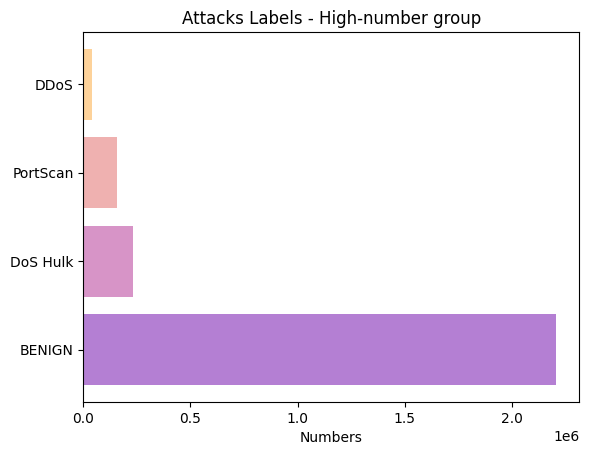

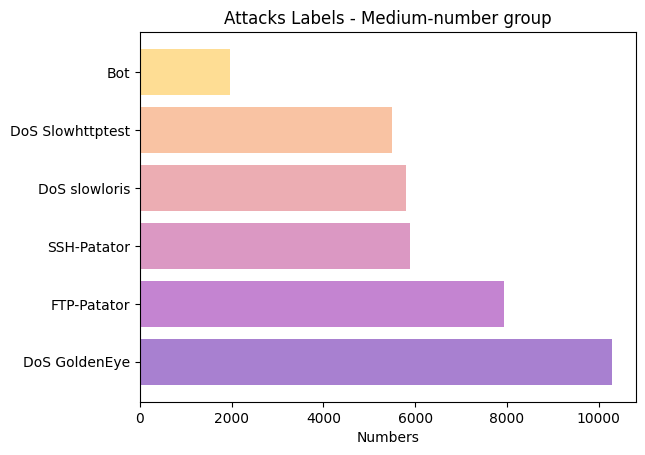

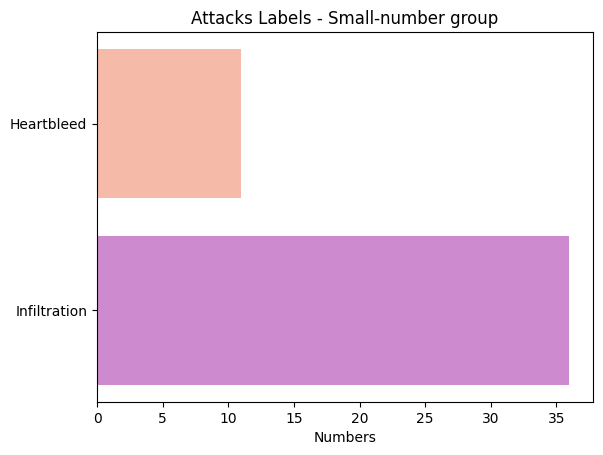

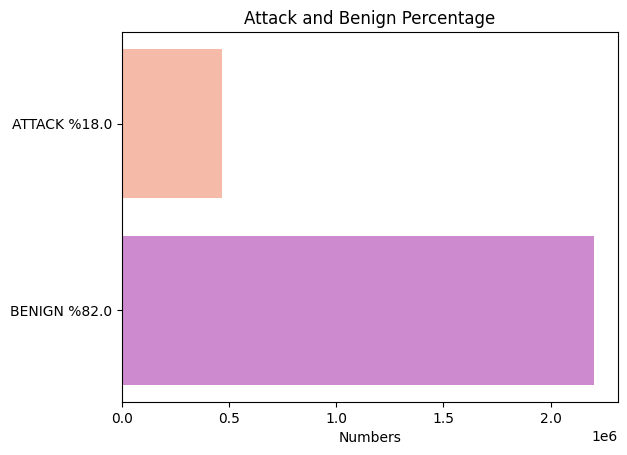

Mission accomplished!
Total operation time: 253.33873414993286 seconds


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import time

# Graph creation function
def graph(objects, performance, x_label, y_label):
    y_pos = np.arange(len(objects))
    plt.barh(y_pos, performance, align='center', alpha=0.5, color=sns.color_palette("plasma", len(objects)))
    plt.yticks(y_pos, objects)
    plt.xlabel(x_label)
    plt.title(y_label)
    plt.show()

# Read the data from the all_data.csv file
df = pd.read_csv('all_data.csv', usecols=["Label"])
print(df.iloc[:, 0].value_counts())
a = df.iloc[:, 0].value_counts()

key = a.keys()
values = a.values
small_labels = []
small_values = []
big_labels = []
big_values = []
medium_labels = []
medium_values = []
attack_count = 0
benign_count = 0

# Group the attacks into 3 groups to display all values on the graph
for i in range(0, len(values)):
    if values[i] > 11000:
        big_labels.append(str(key[i]))
        big_values.append(values[i])
    elif values[i] < 600:
        small_labels.append(str(key[i]))
        small_values.append(values[i])
    else:
        medium_labels.append(str(key[i]))
        medium_values.append(values[i])

    if str(key[i]) == "BENIGN":
        benign_count += values[i]
    else:
        attack_count += values[i]

key = [benign_count, attack_count]

# Create charts
labels = ["BENIGN %" + str(round(benign_count / (benign_count + attack_count), 2) * 100),
          "ATTACK %" + str(round(attack_count / (benign_count + attack_count), 2) * 100)]
graph(big_labels, big_values, "Numbers", "Attacks Labels - High-number group")
graph(medium_labels, medium_values, "Numbers", "Attacks Labels - Medium-number group")
graph(small_labels, small_values, "Numbers", "Attacks Labels - Small-number group")
graph(labels, key, "Numbers", "Attack and Benign Percentage")

print("Mission accomplished!")
print("Total operation time:", time.time() - seconds, "seconds")


## **Breakdown of this Section:**

**The purpose of this program is to produce CSV files consisting of only one type of attack and benign flow.**

**These files contain all attack flow and some benign data flow. The rate : (attack= 30% , benign=70%)**

**normal data streams are randomly selected**

In [11]:
import random
import os
import pandas as pd
import time

# Start the timer
start_time = time.time()

# Function to create a folder
def create_folder(folder_name):
    try:
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)
    except OSError:
        print("The folder could not be created!")

print("This process may take 3 to 8 minutes, depending on the performance of your computer.\n\n")

# Column headers
column_headers = ["Flow ID", "Source IP", "Source Port", "Destination IP", "Destination Port", "Protocol", "Timestamp",
                  "Flow Duration", "Total Fwd Packets", "Total Backward Packets", "Total Length of Fwd Packets",
                  "Total Length of Bwd Packets", "Fwd Packet Length Max", "Fwd Packet Length Min",
                  "Fwd Packet Length Mean", "Fwd Packet Length Std", "Bwd Packet Length Max", "Bwd Packet Length Min",
                  "Bwd Packet Length Mean", "Bwd Packet Length Std", "Flow Bytes/s", "Flow Packets/s", "Flow IAT Mean",
                  "Flow IAT Std", "Flow IAT Max", "Flow IAT Min", "Fwd IAT Total", "Fwd IAT Mean", "Fwd IAT Std",
                  "Fwd IAT Max", "Fwd IAT Min", "Bwd IAT Total", "Bwd IAT Mean", "Bwd IAT Std", "Bwd IAT Max",
                  "Bwd IAT Min", "Fwd PSH Flags", "Bwd PSH Flags", "Fwd URG Flags", "Bwd URG Flags",
                  "Fwd Header Length", "Bwd Header Length", "Fwd Packets/s", "Bwd Packets/s", "Min Packet Length",
                  "Max Packet Length", "Packet Length Mean", "Packet Length Std", "Packet Length Variance",
                  "FIN Flag Count", "SYN Flag Count", "RST Flag Count", "PSH Flag Count", "ACK Flag Count",
                  "URG Flag Count", "CWE Flag Count", "ECE Flag Count", "Down/Up Ratio", "Average Packet Size",
                  "Avg Fwd Segment Size", "Avg Bwd Segment Size", "Fwd Avg Bytes/Bulk", "Fwd Avg Packets/Bulk",
                  "Fwd Avg Bulk Rate", "Bwd Avg Bytes/Bulk", "Bwd Avg Packets/Bulk", "Bwd Avg Bulk Rate",
                  "Subflow Fwd Packets", "Subflow Fwd Bytes", "Subflow Bwd Packets", "Subflow Bwd Bytes",
                  "Init_Win_bytes_forward", "Init_Win_bytes_backward", "act_data_pkt_fwd", "min_seg_size_forward",
                  "Active Mean", "Active Std", "Active Max", "Active Min", "Idle Mean", "Idle Std", "Idle Max",
                  "Idle Min", "Label", "External IP"]

column_headers = ",".join(column_headers)

attacks = ["BENIGN", "Bot", "DDoS", "DoS GoldenEye", "DoS Hulk", "DoS Slowhttptest", "DoS slowloris", "FTP-Patator",
           "Heartbleed", "Infiltration", "PortScan", "SSH-Patator", "Web Attack - Brute Force",
           "Web Attack - Sql Injection", "Web Attack - XSS"]

# Create the 'attacks' folder
create_folder("./attacks/")

benign_count = 2359289

dict_attack = {
    "Bot": 1966,
    "DDoS": 41835,
    "DoS GoldenEye": 10293,
    "DoS Hulk": 231073,
    "DoS Slowhttptest": 5499,
    "DoS slowloris": 5796,
    "FTP-Patator": 7938,
    "Heartbleed": 11,
    "Infiltration": 36,
    "PortScan": 158930,
    "SSH-Patator": 5897,
    "Web Attack - Brute Force": 1507,
    "Web Attack - XSS": 652,
    "Web Attack - Sql Injection": 21
}

for attack in dict_attack:
    attack_count, current_benign_count = 0, 0
    file_path = "./attacks/" + attack + ".csv"

    with open(file_path, "w") as file:
        file.write(column_headers + "\n")

        attack_num = dict_attack[attack]
        if attack_num == 0:
            continue

        benign_num = int(benign_count / (attack_num * (7 / 3))) if attack_num != 0 else 0

        with open("all_data.csv", "r") as all_data:
            while True:
                line = all_data.readline()
                if not line:
                    break

                line = line.strip()
                line_parts = line.split(",")

                if line_parts[83] == "BENIGN":
                    rnd = random.randint(1, benign_num) if benign_num != 0 else 0
                    if rnd == 1:
                        file.write(line + "\n")
                        current_benign_count += 1

                if line_parts[83] == attack:
                    file.write(line + "\n")
                    attack_count += 1

    print(f"{attack} file is completed\nattack: {attack_count}\nbenign: {current_benign_count}\n")

web_attacks = ["Web Attack - Brute Force", "Web Attack - XSS", "Web Attack - Sql Injection"]
merged_file_path = "./attacks/Web Attack.csv"
merged_file_exists = False

for web_attack in web_attacks:
    web_attack_file_path = "./attacks/" + web_attack + ".csv"
    df = pd.read_csv(web_attack_file_path)

    if not merged_file_exists:
        df.to_csv(merged_file_path, index=False)
        merged_file_exists = True
    else:
        df.to_csv(merged_file_path, index=False, header=False, mode="a")

    os.remove(web_attack_file_path)

print("Mission accomplished!")
print("Operation time:", time.time() - start_time, "seconds")


This process may take 3 to 8 minutes, depending on the performance of your computer.


Bot file is completed
attack: 1966
benign: 4359

DDoS file is completed
attack: 41835
benign: 91606

DoS GoldenEye file is completed
attack: 10293
benign: 22374

DoS Hulk file is completed
attack: 231073
benign: 550852

DoS Slowhttptest file is completed
attack: 5499
benign: 11913

DoS slowloris file is completed
attack: 5796
benign: 12669

FTP-Patator file is completed
attack: 7938
benign: 17405

Heartbleed file is completed
attack: 11
benign: 22

Infiltration file is completed
attack: 36
benign: 94

PortScan file is completed
attack: 158930
benign: 367183

SSH-Patator file is completed
attack: 5897
benign: 12778

Web Attack - Brute Force file is completed
attack: 0
benign: 3289

Web Attack - XSS file is completed
attack: 0
benign: 1465

Web Attack - Sql Injection file is completed
attack: 0
benign: 42

Mission accomplished!
Operation time: 229.2058756351471 seconds


## **Breakdown of this Section (Feature Selection for attack files):**

**The purpose of this code is to determine which features to use in the machine learning phase.**

**for this purpose, the importance weights of the attacks are calculated.**

**this calculation was made using sklearn-RandomForestRegressor**

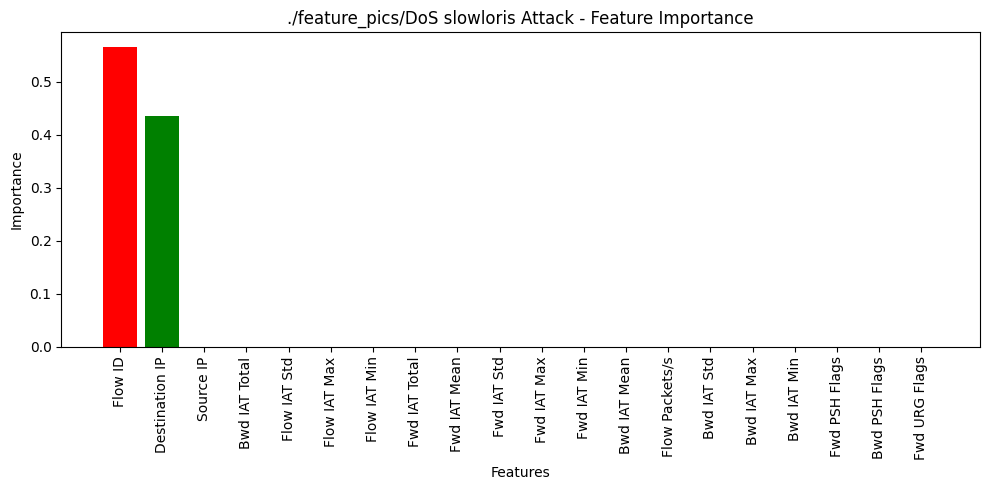

DoS slowloris Importance List:
                Importance
Features                  
Flow ID           0.564551
Destination IP    0.435178
Source IP         0.000272
Bwd IAT Total     0.000000
Flow IAT Std      0.000000
Flow IAT Max      0.000000
Flow IAT Min      0.000000
Fwd IAT Total     0.000000
Fwd IAT Mean      0.000000
Fwd IAT Std       0.000000
Fwd IAT Max       0.000000
Fwd IAT Min       0.000000
Bwd IAT Mean      0.000000
Flow Packets/s    0.000000
Bwd IAT Std       0.000000
Bwd IAT Max       0.000000
Bwd IAT Min       0.000000
Fwd PSH Flags     0.000000
Bwd PSH Flags     0.000000
Fwd URG Flags     0.000000 


DoS slowloris = ['Flow ID', 'Destination IP', 'Source IP', 'Bwd IAT Total', 'Flow IAT Std']
-----------------------------------------------------------------------------------------------






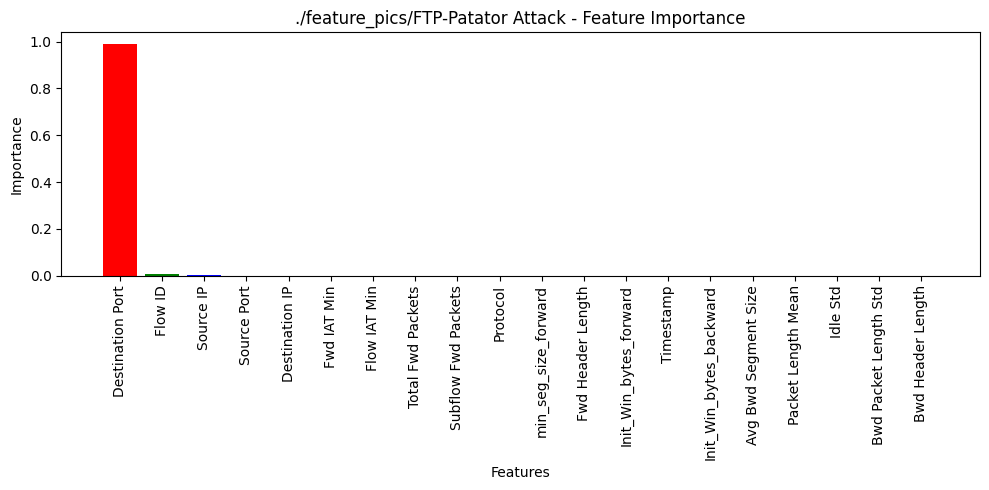

FTP-Patator Importance List:
                         Importance
Features                           
Destination Port           0.990593
Flow ID                    0.007503
Source IP                  0.001376
Source Port                0.000165
Destination IP             0.000117
Fwd IAT Min                0.000056
Flow IAT Min               0.000047
Total Fwd Packets          0.000026
Subflow Fwd Packets        0.000022
Protocol                   0.000012
min_seg_size_forward       0.000011
Fwd Header Length          0.000010
Init_Win_bytes_forward     0.000009
Timestamp                  0.000008
Init_Win_bytes_backward    0.000005
Avg Bwd Segment Size       0.000004
Packet Length Mean         0.000004
Idle Std                   0.000003
Bwd Packet Length Std      0.000003
Bwd Header Length          0.000002 


FTP-Patator = ['Destination Port', 'Flow ID', 'Source IP', 'Source Port', 'Destination IP']
------------------------------------------------------------------------------------

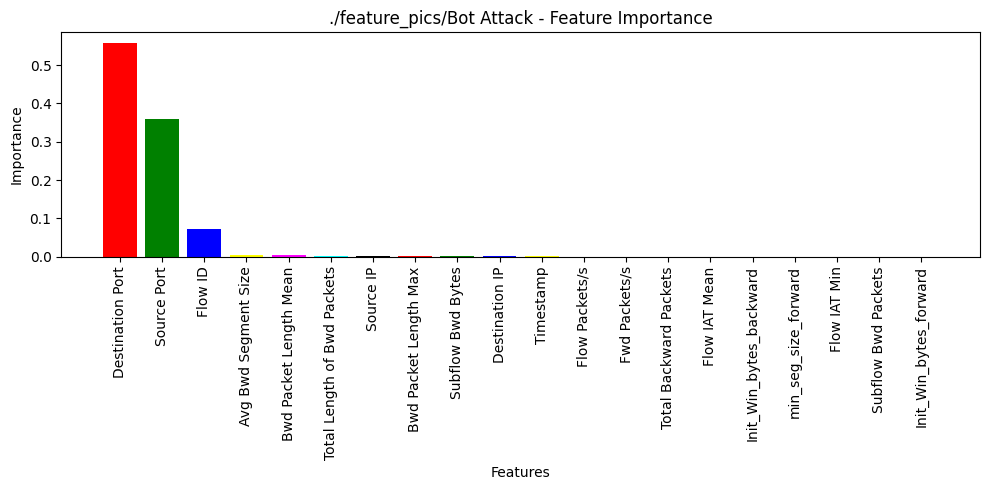

Bot Importance List:
                             Importance
Features                               
Destination Port               0.558015
Source Port                    0.358487
Flow ID                        0.070825
Avg Bwd Segment Size           0.003826
Bwd Packet Length Mean         0.003590
Total Length of Bwd Packets    0.000917
Source IP                      0.000781
Bwd Packet Length Max          0.000744
Subflow Bwd Bytes              0.000601
Destination IP                 0.000413
Timestamp                      0.000327
Flow Packets/s                 0.000230
Fwd Packets/s                  0.000189
Total Backward Packets         0.000154
Flow IAT Mean                  0.000148
Init_Win_bytes_backward        0.000134
min_seg_size_forward           0.000112
Flow IAT Min                   0.000111
Subflow Bwd Packets            0.000065
Init_Win_bytes_forward         0.000062 


Bot = ['Destination Port', 'Source Port', 'Flow ID', 'Avg Bwd Segment Size', 'Bwd Packet Length 

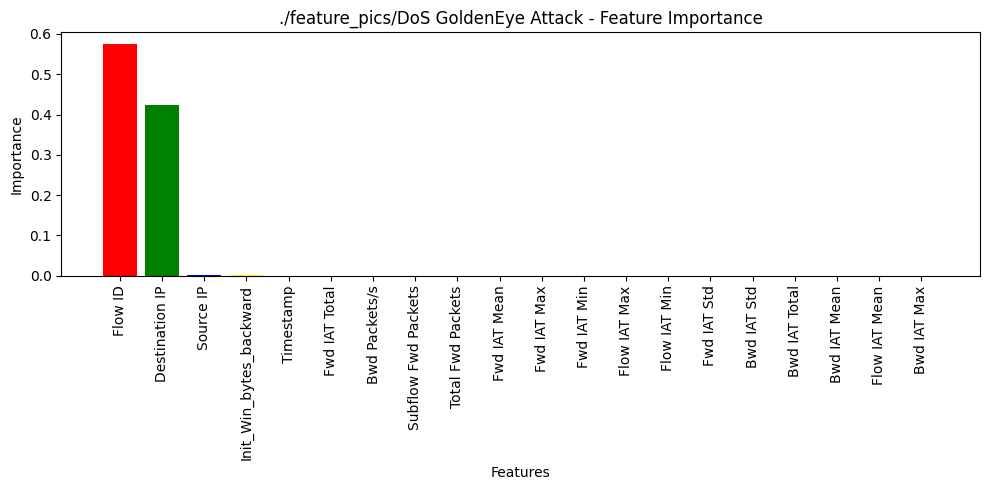

DoS GoldenEye Importance List:
                         Importance
Features                           
Flow ID                    0.575356
Destination IP             0.423917
Source IP                  0.000377
Init_Win_bytes_backward    0.000319
Timestamp                  0.000013
Fwd IAT Total              0.000005
Bwd Packets/s              0.000005
Subflow Fwd Packets        0.000003
Total Fwd Packets          0.000002
Fwd IAT Mean               0.000002
Fwd IAT Max                0.000001
Fwd IAT Min                0.000000
Flow IAT Max               0.000000
Flow IAT Min               0.000000
Fwd IAT Std                0.000000
Bwd IAT Std                0.000000
Bwd IAT Total              0.000000
Bwd IAT Mean               0.000000
Flow IAT Mean              0.000000
Bwd IAT Max                0.000000 


DoS GoldenEye = ['Flow ID', 'Destination IP', 'Source IP', 'Init_Win_bytes_backward', 'Timestamp']
---------------------------------------------------------------------------

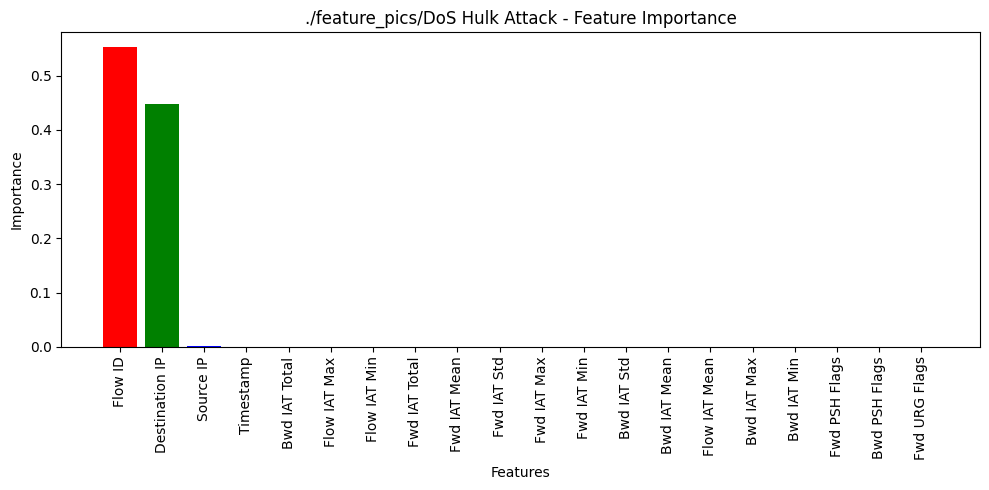

DoS Hulk Importance List:
                Importance
Features                  
Flow ID           0.552420
Destination IP    0.447147
Source IP         0.000431
Timestamp         0.000001
Bwd IAT Total     0.000000
Flow IAT Max      0.000000
Flow IAT Min      0.000000
Fwd IAT Total     0.000000
Fwd IAT Mean      0.000000
Fwd IAT Std       0.000000
Fwd IAT Max       0.000000
Fwd IAT Min       0.000000
Bwd IAT Std       0.000000
Bwd IAT Mean      0.000000
Flow IAT Mean     0.000000
Bwd IAT Max       0.000000
Bwd IAT Min       0.000000
Fwd PSH Flags     0.000000
Bwd PSH Flags     0.000000
Fwd URG Flags     0.000000 


DoS Hulk = ['Flow ID', 'Destination IP', 'Source IP', 'Timestamp', 'Bwd IAT Total']
-----------------------------------------------------------------------------------------------






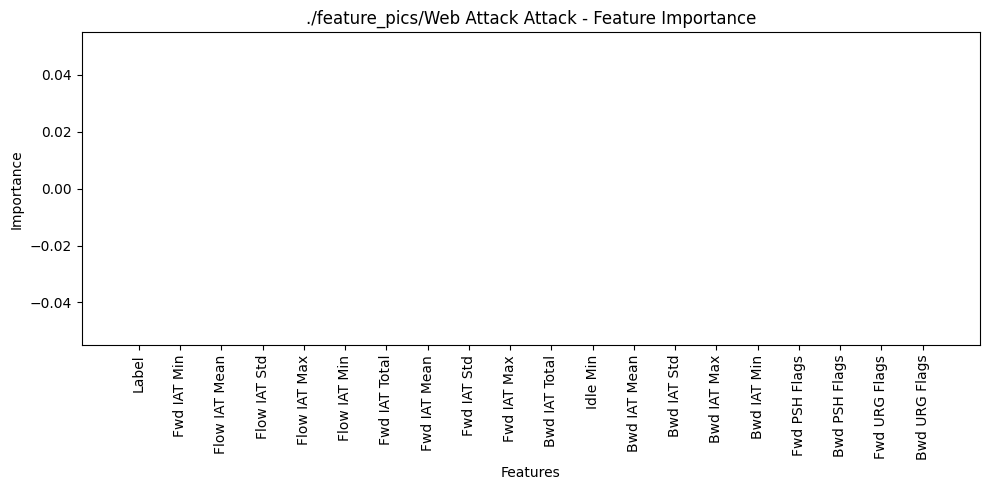

Web Attack Importance List:
               Importance
Features                 
Label                 0.0
Fwd IAT Min           0.0
Flow IAT Mean         0.0
Flow IAT Std          0.0
Flow IAT Max          0.0
Flow IAT Min          0.0
Fwd IAT Total         0.0
Fwd IAT Mean          0.0
Fwd IAT Std           0.0
Fwd IAT Max           0.0
Bwd IAT Total         0.0
Idle Min              0.0
Bwd IAT Mean          0.0
Bwd IAT Std           0.0
Bwd IAT Max           0.0
Bwd IAT Min           0.0
Fwd PSH Flags         0.0
Bwd PSH Flags         0.0
Fwd URG Flags         0.0
Bwd URG Flags         0.0 


Web Attack = ['Label', 'Fwd IAT Min', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max']
-----------------------------------------------------------------------------------------------






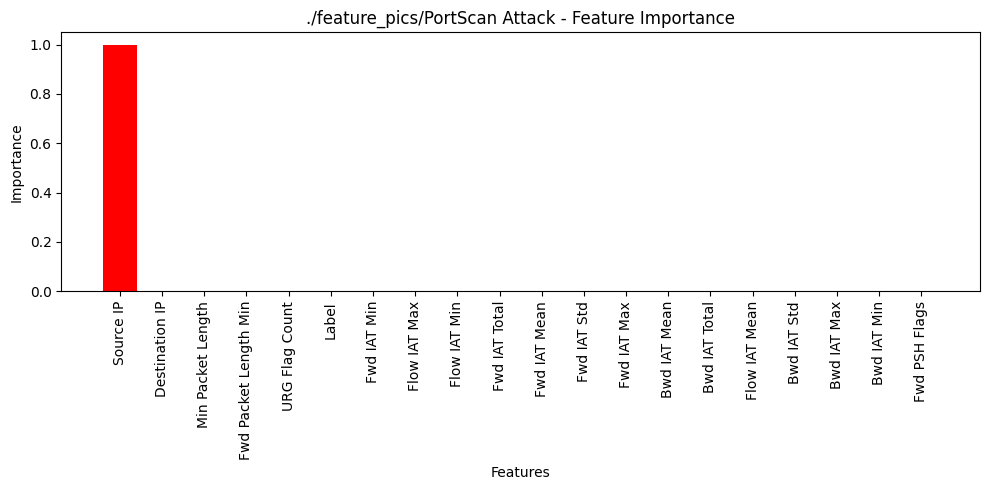

PortScan Importance List:
                         Importance
Features                           
Source IP              9.999123e-01
Destination IP         8.044218e-05
Min Packet Length      4.110781e-06
Fwd Packet Length Min  2.701496e-06
URG Flag Count         3.972304e-07
Label                  0.000000e+00
Fwd IAT Min            0.000000e+00
Flow IAT Max           0.000000e+00
Flow IAT Min           0.000000e+00
Fwd IAT Total          0.000000e+00
Fwd IAT Mean           0.000000e+00
Fwd IAT Std            0.000000e+00
Fwd IAT Max            0.000000e+00
Bwd IAT Mean           0.000000e+00
Bwd IAT Total          0.000000e+00
Flow IAT Mean          0.000000e+00
Bwd IAT Std            0.000000e+00
Bwd IAT Max            0.000000e+00
Bwd IAT Min            0.000000e+00
Fwd PSH Flags          0.000000e+00 


PortScan = ['Source IP', 'Destination IP', 'Min Packet Length', 'Fwd Packet Length Min', 'URG Flag Count']
------------------------------------------------------------------------

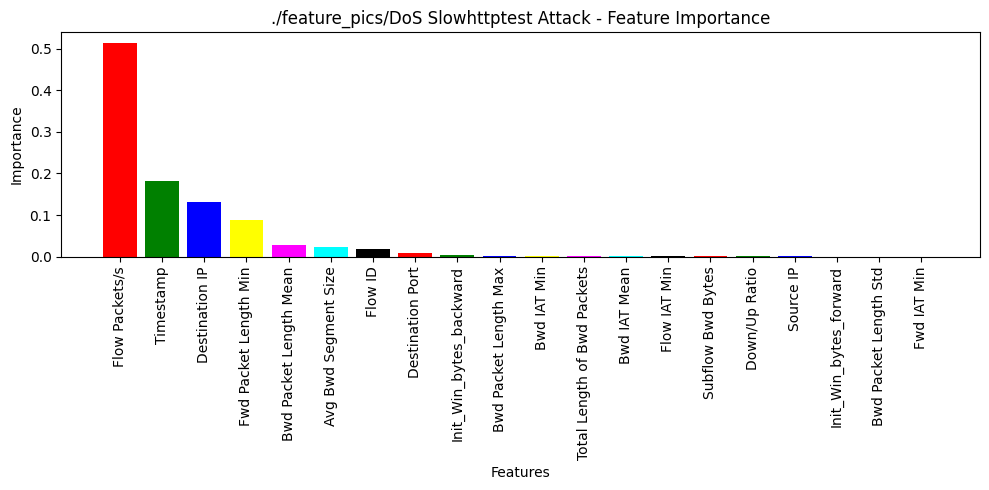

DoS Slowhttptest Importance List:
                             Importance
Features                               
Flow Packets/s                 0.513581
Timestamp                      0.181048
Destination IP                 0.130134
Fwd Packet Length Min          0.087527
Bwd Packet Length Mean         0.027029
Avg Bwd Segment Size           0.022161
Flow ID                        0.019097
Destination Port               0.008284
Init_Win_bytes_backward        0.003740
Bwd Packet Length Max          0.001351
Bwd IAT Min                    0.001228
Total Length of Bwd Packets    0.001081
Bwd IAT Mean                   0.000837
Flow IAT Min                   0.000582
Subflow Bwd Bytes              0.000520
Down/Up Ratio                  0.000290
Source IP                      0.000261
Init_Win_bytes_forward         0.000207
Bwd Packet Length Std          0.000170
Fwd IAT Min                    0.000159 


DoS Slowhttptest = ['Flow Packets/s', 'Timestamp', 'Destination IP', 'Fwd Packet Le

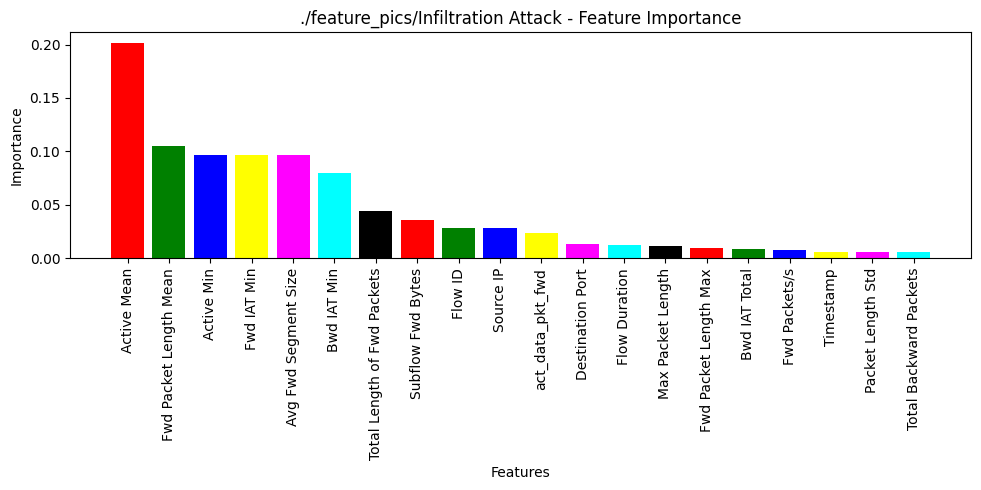

Infiltration Importance List:
                             Importance
Features                               
Active Mean                    0.201377
Fwd Packet Length Mean         0.105285
Active Min                     0.096903
Fwd IAT Min                    0.096259
Avg Fwd Segment Size           0.096213
Bwd IAT Min                    0.080188
Total Length of Fwd Packets    0.043979
Subflow Fwd Bytes              0.035857
Flow ID                        0.028473
Source IP                      0.028264
act_data_pkt_fwd               0.024062
Destination Port               0.013471
Flow Duration                  0.012559
Max Packet Length              0.011362
Fwd Packet Length Max          0.009243
Bwd IAT Total                  0.008777
Fwd Packets/s                  0.007659
Timestamp                      0.006222
Packet Length Std              0.006197
Total Backward Packets         0.005428 


Infiltration = ['Active Mean', 'Fwd Packet Length Mean', 'Active Min', 'Fwd IAT Min', '

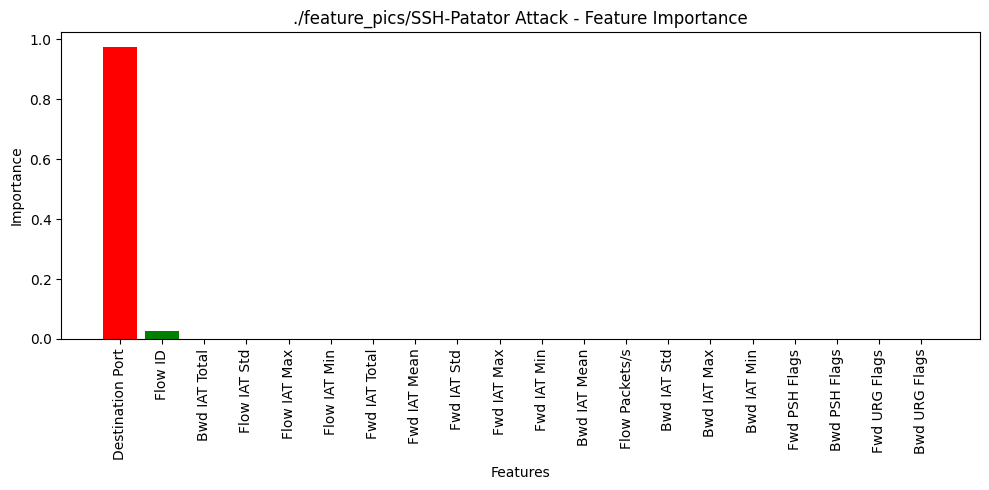

SSH-Patator Importance List:
                  Importance
Features                    
Destination Port     0.97433
Flow ID              0.02567
Bwd IAT Total        0.00000
Flow IAT Std         0.00000
Flow IAT Max         0.00000
Flow IAT Min         0.00000
Fwd IAT Total        0.00000
Fwd IAT Mean         0.00000
Fwd IAT Std          0.00000
Fwd IAT Max          0.00000
Fwd IAT Min          0.00000
Bwd IAT Mean         0.00000
Flow Packets/s       0.00000
Bwd IAT Std          0.00000
Bwd IAT Max          0.00000
Bwd IAT Min          0.00000
Fwd PSH Flags        0.00000
Bwd PSH Flags        0.00000
Fwd URG Flags        0.00000
Bwd URG Flags        0.00000 


SSH-Patator = ['Destination Port', 'Flow ID', 'Bwd IAT Total', 'Flow IAT Std', 'Flow IAT Max']
-----------------------------------------------------------------------------------------------






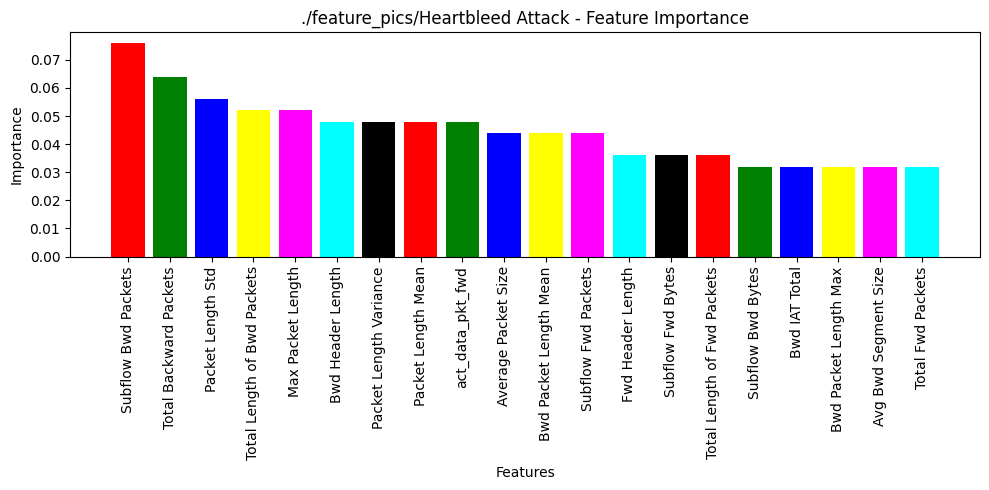

Heartbleed Importance List:
                             Importance
Features                               
Subflow Bwd Packets               0.076
Total Backward Packets            0.064
Packet Length Std                 0.056
Total Length of Bwd Packets       0.052
Max Packet Length                 0.052
Bwd Header Length                 0.048
Packet Length Variance            0.048
Packet Length Mean                0.048
act_data_pkt_fwd                  0.048
Average Packet Size               0.044
Bwd Packet Length Mean            0.044
Subflow Fwd Packets               0.044
Fwd Header Length                 0.036
Subflow Fwd Bytes                 0.036
Total Length of Fwd Packets       0.036
Subflow Bwd Bytes                 0.032
Bwd IAT Total                     0.032
Bwd Packet Length Max             0.032
Avg Bwd Segment Size              0.032
Total Fwd Packets                 0.032 


Heartbleed = ['Subflow Bwd Packets', 'Total Backward Packets', 'Packet Length Std', 'Tota

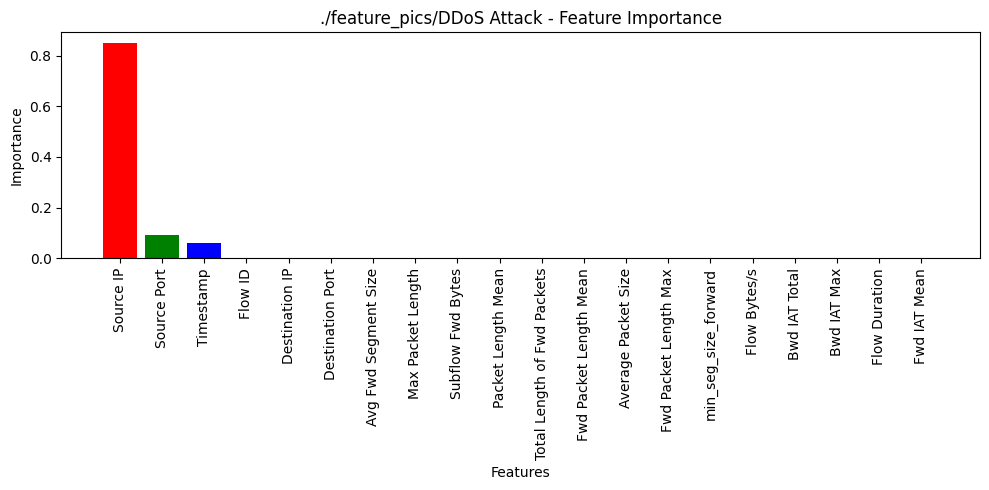

DDoS Importance List:
                             Importance
Features                               
Source IP                      0.849225
Source Port                    0.090756
Timestamp                      0.059001
Flow ID                        0.000627
Destination IP                 0.000211
Destination Port               0.000092
Avg Fwd Segment Size           0.000014
Max Packet Length              0.000011
Subflow Fwd Bytes              0.000010
Packet Length Mean             0.000009
Total Length of Fwd Packets    0.000008
Fwd Packet Length Mean         0.000008
Average Packet Size            0.000007
Fwd Packet Length Max          0.000005
min_seg_size_forward           0.000004
Flow Bytes/s                   0.000002
Bwd IAT Total                  0.000002
Bwd IAT Max                    0.000001
Flow Duration                  0.000001
Fwd IAT Mean                   0.000001 


DDoS = ['Source IP', 'Source Port', 'Timestamp', 'Flow ID', 'Destination IP']
-----------------

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import time

def create_folder(folder_name):
    try:
        os.makedirs(folder_name, exist_ok=True)
    except OSError:
        print("The folder could not be created!")

def plot_feature_importance(features, importances, filename):
    colors = ['red', 'green', 'blue', 'yellow', 'magenta', 'cyan', 'black']
    plt.figure(figsize=(10, 5))
    plt.bar(features, importances, color=colors)
    plt.title(filename + " Attack - Feature Importance")
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig(filename + ".pdf", bbox_inches='tight', orientation='portrait', format='pdf')
    plt.show()

def process_csv_file(filename):
    df = pd.read_csv(f"./attacks/{filename}")
    df = df.fillna(0)
    df['Label'] = (df['Label'] == "BENIGN").astype(int)

    y = df["Label"].values
    X = df.drop("Label", axis=1).values.astype(float)
    X[np.isnan(X)] = 0
    X[np.isinf(X)] = 0

    forest = RandomForestRegressor(n_estimators=250, random_state=0)
    forest.fit(X, y)
    importances = forest.feature_importances_
    indices = importances.argsort()[::-1]
    feature_importances = pd.DataFrame({'Features': df.columns[indices[:20]], 'Importance': importances[indices[:20]]})
    feature_importances.set_index('Features', inplace=True)

    plot_feature_importance(feature_importances.index, feature_importances['Importance'], f"./feature_pics/{filename[:-4]}")
    feature_list = list(feature_importances.index)
    feature_list_str = f"{filename[:-4]} = {feature_list[:5]}"

    print(f"{filename[:-4]} Importance List:")
    print(feature_importances.head(20), "\n\n")
    print(feature_list_str)

    return feature_list_str

# Create folder for feature pictures
create_folder("feature_pics")

# CSV file names
csv_files = os.listdir("attacks")

# Open a file to store importance lists
with open("importance_list_for_attack_files.csv", "w") as ths:
    # Process each CSV file
    for filename in csv_files:
        feature_list_str = process_csv_file(filename)
        ths.write(feature_list_str + "\n")
        print("-----------------------------------------------------------------------------------------------\n\n\n\n")

print("Mission accomplished!")
print("Total operation time:", time.time() - seconds, "seconds")
